# 3. Sex, Race, and Education

Is there a relationship between sex/race and education? Let's take a closer look. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shelve
import os
import scipy.stats as stats
from itertools import combinations

plt.style.use('seaborn-dark')

In [2]:
clean_adult = pd.read_hdf('results/df1.h5', 'clean_adult/')
clean_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


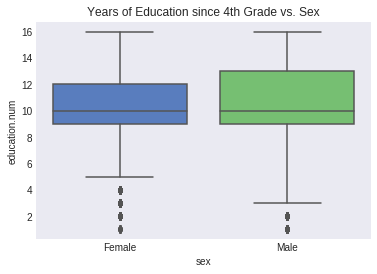

In [3]:
ax = sns.boxplot(x="sex", y="education.num", data=clean_adult, palette="muted")
ax.set_title("Years of Education since 4th Grade vs. Sex");
plt.savefig("fig/education_sex.png")

Wow! They look quite similar, with the same mean of education.num = 10 years, although it seems that males finish college more often (education.num = 13 years).

What about race?

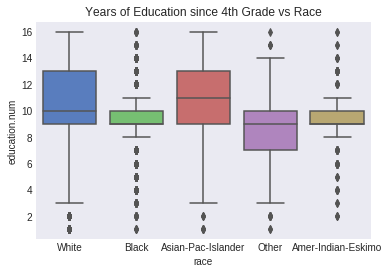

In [4]:
ax = sns.boxplot(x="race", y="education.num", data=clean_adult, palette="muted")
ax.set_title("Years of Education since 4th Grade vs Race")
plt.savefig("fig/education_race.png")

Some observations are:
* Black, Native American/Eskimo, and Other groups have a high variance and low median compared to the White and Asian/Pacific Islander groups. This is not surprising. Unfortunately not much has changed since 1994. 
* The Asian/Pacific Islander group has the highest mean education. This reflects both the fact that immigrants in this group tend to have a high education and also the culture valuing education by this group.

Now it's time to some hypothesis testing. We want to see if there is a difference in education between groups. For this case we will use the two sample t-test. The conditions for the test are:
* The sampling method for each sample is simple random sampling.
* The samples are independent.
* Each population is at least 20 times larger than its respective sample.
* The sampling distribution is approximately normal.

We have no reason to believe that these assumptions are not met.

In [5]:
def two_sample_t_test(group1, group2, group1_name, group2_name, alpha = 0.05):
    """Performs a two-sided two sample t-test to see if there is a difference in mean between
    the value of two groups. 
    
    Parameters
    ----------
    group1: Data for the first group. Can be list or array
    group2: Data for the second group. Can be list or array
    group1_name: Name of first group
    group2_name: Name of second group
    alpha: Significance level, default of 0.05 (Although this is very arbitrary as we saw in this class)
    
    
    Return
    ------
    (t, p, reject)
    t: the t-statistic
    p: the p-value
    reject: whether we reject the null hypothesis
    
    Example
    -------
    
    >>> group1 = [1, 2, 3]
    ... group2 = [1, 2, 3]
    ... two_sample_t_test(group1, group2, "group1", "group2")
    There is no statistically significant difference between Group group1 and Group group2
    (0.0, 1.0)    
    """    
        
    n1 = len(group1)
    n2 = len(group2)
    assert(n1 > 0)
    assert(n2 > 0)
    s12 = np.var(group1)
    s22 = np.var(group2)
    m1 = np.mean(group1)
    m2 = np.mean(group2)
    se = np.sqrt((s12/n1) + (s22/n2))
    df = (np.square(s12/n1 + s22/n2) / (( np.square(s12 / n1) / (n1 - 1) ) + (np.square(s22 / n2) / (n2 - 1)))).astype(int)
    t = ((m1 - m2)) / se
    p = stats.t.sf(np.abs(t), df)*2
    if (p < alpha):
        print("The mean difference is statistically significant for Group "  + group1_name +" and Group " + group2_name)
        print("p-value is " + str(p))
        print()
    else:
        print("There is no statistically significant difference between Group " + group1_name +" and Group " + group2_name)
        print()
    return (t, p, p < alpha)

In [6]:
male = clean_adult[clean_adult["sex"] == "Male"]
female = clean_adult[clean_adult["sex"] == "Female"]
t, p, reject = two_sample_t_test(male["education.num"], female["education.num"], "Male", "Female")

There is no statistically significant difference between Group Male and Group Female



As expected from looking at the box plot, males and females do not have statistically different years of education.

In [7]:
races = clean_adult.groupby("race")
pairs = [",".join(map(str, comb)).split(",") for comb in combinations(races.groups.keys(), 2)]
for pair in pairs:
    race1_name = pair[0]
    race2_name = pair[1]
    race1 = races.get_group(pair[0])
    race2 = races.get_group(pair[1])
    two_sample_t_test(race1["education.num"], race2["education.num"], race1_name, race2_name)

The mean difference is statistically significant for Group Amer-Indian-Eskimo and Group Asian-Pac-Islander
p-value is 3.13492993644e-23

There is no statistically significant difference between Group Amer-Indian-Eskimo and Group Black

The mean difference is statistically significant for Group Amer-Indian-Eskimo and Group Other
p-value is 0.00709780510747

The mean difference is statistically significant for Group Amer-Indian-Eskimo and Group White
p-value is 1.80818942375e-09

The mean difference is statistically significant for Group Asian-Pac-Islander and Group Black
p-value is 5.2608000932e-44

The mean difference is statistically significant for Group Asian-Pac-Islander and Group Other
p-value is 3.88949414009e-21

The mean difference is statistically significant for Group Asian-Pac-Islander and Group White
p-value is 2.62019447341e-18

The mean difference is statistically significant for Group Black and Group Other
p-value is 0.000111081299559

The mean difference is statisticall

The results match with looking at the box plots again: The only non-statistically significant difference is the Black group and the Native American/Eskimo group. 

Thus, we saw that there is a relationship between education and race, but not a relationship between education and sex.

**Testing Section**

In [8]:
import unittest

In [9]:
class MyTests(unittest.TestCase):
    def test_same_population(self):
        group1 = [1, 2, 3]
        group2 = group1
        t, p, reject = two_sample_t_test(group1, group2, "group1", "group2")
        self.assertAlmostEqual(0, t)
        self.assertAlmostEqual(1, p)
        self.assertTrue(not reject)
    def test_obvious_difference(self):
        group1 = [1, 2, 3]
        group2 = [1000, 1001, 1001]
        t, p, reject = two_sample_t_test(group1, group2, "group1", "group2")
        self.assertAlmostEqual(0, p)
        self.assertTrue(reject)
    def test_significance_level(self):
        t, p, reject = two_sample_t_test([1, 2, 3], [4,9, 5], "group1", "group2", 0.1)
        self.assertAlmostEqual(0.1, p, places = 1)
        self.assertTrue(reject)
        t, p, reject = two_sample_t_test([1, 2, 3], [4,9, 5], "group1", "group2")
        self.assertAlmostEqual(0.1, p, places = 1)
        self.assertTrue(not reject)
    def test_same_population_different_order(self):
        group1 = [1, 2, 4]
        group2 = [2, 4, 1]
        t, p, reject = two_sample_t_test(group1, group2, "group1", "group2")
        self.assertAlmostEqual(0, t)
        self.assertAlmostEqual(1, p)

In [10]:
unittest.main(argv=["foo"], exit = False, verbosity = 2)

test_obvious_difference (__main__.MyTests) ... ok
test_same_population (__main__.MyTests) ... ok
test_same_population_different_order (__main__.MyTests) ... ok
test_significance_level (__main__.MyTests) ... 

The mean difference is statistically significant for Group group1 and Group group2
p-value is 3.57106662485e-10

There is no statistically significant difference between Group group1 and Group group2

There is no statistically significant difference between Group group1 and Group group2

The mean difference is statistically significant for Group group1 and Group group2
p-value is 0.0954659662667

There is no statistically significant difference between Group group1 and Group group2



ok

----------------------------------------------------------------------
Ran 4 tests in 0.013s

OK
